In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.api import VAR

In [167]:
df = pd.read_excel('monthly averages_2004-19 _complete.xlsx')
df

,Year,Month,Jibe Ali (mm),Umm Sugeim (mm),Memzer (mm),Dhaw Wharfage (mm),Al Jadaf (mm)
0,2004,1,Data Unavailable,Data Unavailable,Data Unavailable,Data Unavailable,Data Unavailable
1,2004,2,Data Unavailable,Data Unavailable,Data Unavailable,Data Unavailable,Data Unavailable
2,2004,3,2.317679,2.762295,1.707807,2.853417,2.772815
3,2004,4,2.377865,2.823819,1.741653,2.974607,2.876343
4,2004,5,2.470564,2.959541,1.838213,3.011566,2.975748
...,...,...,...,...,...,...,...
187,2019,8,Data Unavailable,Data Unavailable,Data Unavailable,Data Unavailable,Data Unavailable
188,2019,9,Data Unavailable,Data Unavailable,Data Unavailable,Data Unavailable,Data Unavailable
189,2019,10,Data Unavailable,Data Unavailable,Data Unavailable,Data Unavailable,Data Unavailable
190,2019,11,Data Unavailable,Data Unavailable,Data Unavailable,Data Unavailable,Data Unavailable


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                192 non-null    int64 
 1   Month               192 non-null    int64 
 2   Jibe Ali (mm)       192 non-null    object
 3   Umm Sugeim (mm)     192 non-null    object
 4   Memzer (mm)         192 non-null    object
 5   Dhaw Wharfage (mm)  192 non-null    object
 6   Al Jadaf (mm)       192 non-null    object
dtypes: int64(2), object(5)
memory usage: 10.6+ KB


In [169]:
df.isnull().sum()

Year                  0
Month                 0
Jibe Ali (mm)         0
Umm Sugeim (mm)       0
Memzer (mm)           0
Dhaw Wharfage (mm)    0
Al Jadaf (mm)         0
dtype: int64

In [170]:
# Change all Data Unavailable to np.nan
for col in df.columns:
  if('Data Unavailable' in df[col].unique()):
    print(col)
    df[col] = pd.to_numeric(df[col], errors = "coerce")

Jibe Ali (mm)
Umm Sugeim (mm)
Memzer (mm)
Dhaw Wharfage (mm)
Al Jadaf (mm)


C:\Users\Durga\AppData\Local\Temp\ipykernel_4100\1497955513.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if('Data Unavailable' in df[col].unique()):


In [171]:
df.head() # Observe all Data Unavialable has changed to NaN

,Year,Month,Jibe Ali (mm),Umm Sugeim (mm),Memzer (mm),Dhaw Wharfage (mm),Al Jadaf (mm)
0,2004,1,NaN,NaN,NaN,NaN,NaN
1,2004,2,NaN,NaN,NaN,NaN,NaN
2,2004,3,2.317679,2.762295,1.707807,2.853417,2.772815
3,2004,4,2.377865,2.823819,1.741653,2.974607,2.876343
4,2004,5,2.470564,2.959541,1.838213,3.011566,2.975748


In [172]:
df.info() # The dtype has changed to float64 from object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                192 non-null    int64  
 1   Month               192 non-null    int64  
 2   Jibe Ali (mm)       182 non-null    float64
 3   Umm Sugeim (mm)     176 non-null    float64
 4   Memzer (mm)         176 non-null    float64
 5   Dhaw Wharfage (mm)  169 non-null    float64
 6   Al Jadaf (mm)       170 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 10.6 KB


In [173]:
# Adding a date column due to time-series data, assume the day to be the last day of that month, since its a monthly average value
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1)) + pd.offsets.MonthEnd(1)

In [174]:
df.head()

,Year,Month,Jibe Ali (mm),Umm Sugeim (mm),Memzer (mm),Dhaw Wharfage (mm),Al Jadaf (mm),Date
0,2004,1,NaN,NaN,NaN,NaN,NaN,2004-01-31
1,2004,2,NaN,NaN,NaN,NaN,NaN,2004-02-29
2,2004,3,2.317679,2.762295,1.707807,2.853417,2.772815,2004-03-31
3,2004,4,2.377865,2.823819,1.741653,2.974607,2.876343,2004-04-30
4,2004,5,2.470564,2.959541,1.838213,3.011566,2.975748,2004-05-31


In [175]:
def printGraph(df):
    fig, ax = plt.subplots(figsize=(15, 6))
    colors = plt.cm.tab10.colors  
    columns_to_plot = ['Jibe Ali (mm)', 'Umm Sugeim (mm)', 'Memzer (mm)', 'Dhaw Wharfage (mm)', 'Al Jadaf (mm)']
    for i, col in enumerate(columns_to_plot):  
        ax.plot(df['Date'], df[col], label=col, color=colors[i])
    ax.set_xlabel('Year')
    ax.set_ylabel('Water Level (mm)')  
    ax.legend(loc='upper left')
    ax.set_title("Monthly Average Tide Levels along Dubai's coast")
    plt.tight_layout()
    plt.show()

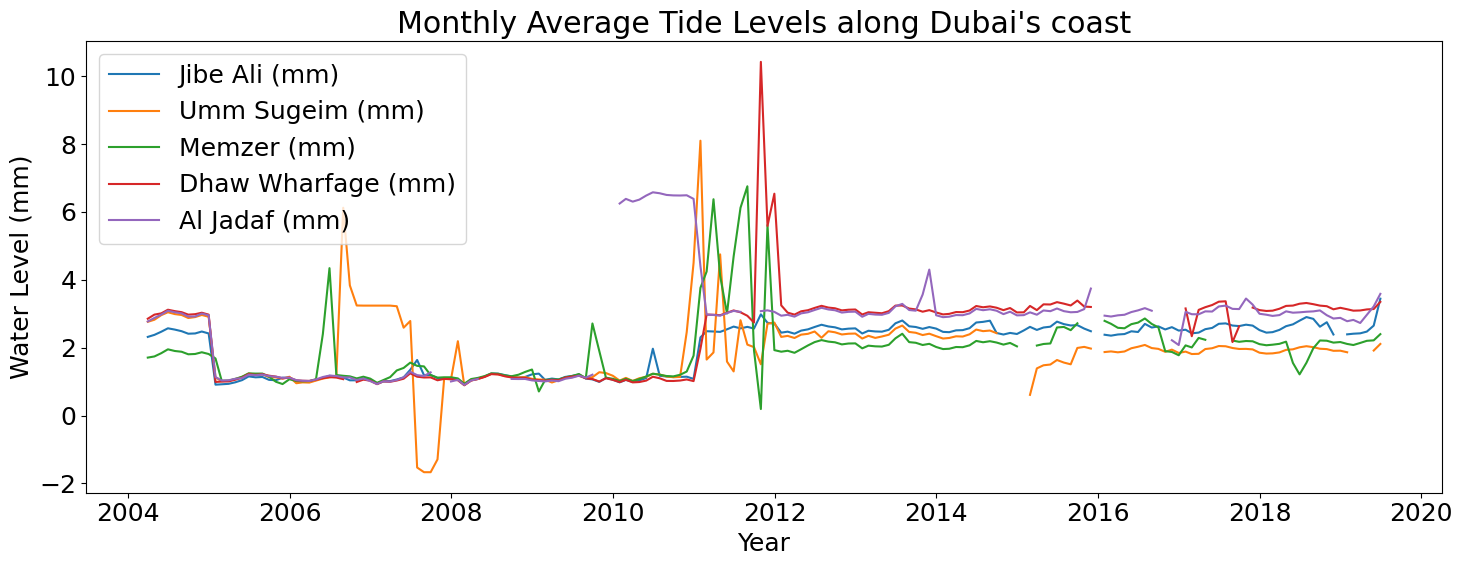

In [176]:
printGraph(df)

In [177]:
demo= df.copy()

From the above graph, a lot of gaps can be observed. A neural network needs all values and hence the gaps must be filled

In [178]:
# Observe the NaN values in the dataset
df.isna().sum()

Year                   0
Month                  0
Jibe Ali (mm)         10
Umm Sugeim (mm)       16
Memzer (mm)           16
Dhaw Wharfage (mm)    23
Al Jadaf (mm)         22
Date                   0
dtype: int64

In [179]:
df[df.isnull().any(axis=1)]

,Year,Month,Jibe Ali (mm),Umm Sugeim (mm),Memzer (mm),Dhaw Wharfage (mm),Al Jadaf (mm),Date
0,2004,1,NaN,NaN,NaN,NaN,NaN,2004-01-31
1,2004,2,NaN,NaN,NaN,NaN,NaN,2004-02-29
32,2006,9,1.038414,3.835369,1.154701,NaN,1.122404,2006-09-30
45,2007,10,1.103838,-1.292504,1.117634,1.039555,NaN,2007-10-31
46,2007,11,1.102317,1.080594,1.127449,1.079394,NaN,2007-11-30
52,2008,5,1.147983,1.145546,1.162793,1.136985,NaN,2008-05-31
53,2008,6,1.239895,1.229648,1.240631,1.220094,NaN,2008-06-30
54,2008,7,1.234473,1.217509,1.230180,1.211271,NaN,2008-07-31
55,2008,8,1.189918,1.167497,1.182850,1.155485,NaN,2008-08-31
69,2009,10,0.992324,1.276709,1.896513,1.001374,NaN,2009-10-31


## Linear Interpolation for short gaps

In [180]:
# Linear Interpolation for short gaps
def interpolate(df):
  data_columns = df.columns[2:]
  for col in data_columns:
    df[col] = df[col].interpolate(method='time',limit_direction='both')
    
  return df

df_final = df.set_index('Date')
df_final = interpolate(df_final.copy())
df_final

,Year,Month,Jibe Ali (mm),Umm Sugeim (mm),Memzer (mm),Dhaw Wharfage (mm),Al Jadaf (mm)
Date,,,,,,,
2004-01-31,2004,1,2.317679,2.762295,1.707807,2.853417,2.772815
2004-02-29,2004,2,2.317679,2.762295,1.707807,2.853417,2.772815
2004-03-31,2004,3,2.317679,2.762295,1.707807,2.853417,2.772815
2004-04-30,2004,4,2.377865,2.823819,1.741653,2.974607,2.876343
2004-05-31,2004,5,2.470564,2.959541,1.838213,3.011566,2.975748
...,...,...,...,...,...,...,...
2019-08-31,2019,8,3.444781,2.109665,2.399351,3.350319,3.586558
2019-09-30,2019,9,3.444781,2.109665,2.399351,3.350319,3.586558
2019-10-31,2019,10,3.444781,2.109665,2.399351,3.350319,3.586558


In [181]:
df.tail(10)

,Year,Month,Jibe Ali (mm),Umm Sugeim (mm),Memzer (mm),Dhaw Wharfage (mm),Al Jadaf (mm),Date
182,2019,3,2.422954,NaN,2.139713,3.096847,2.727922,2019-03-31
183,2019,4,2.474508,NaN,2.202345,3.127489,2.966254,2019-04-30
184,2019,5,2.650254,1.915632,2.216364,3.139098,3.215932,2019-05-31
185,2019,6,3.444781,2.109665,2.399351,3.350319,3.586558,2019-06-30
186,2019,7,NaN,NaN,NaN,NaN,NaN,2019-07-31
187,2019,8,NaN,NaN,NaN,NaN,NaN,2019-08-31
188,2019,9,NaN,NaN,NaN,NaN,NaN,2019-09-30
189,2019,10,NaN,NaN,NaN,NaN,NaN,2019-10-31
190,2019,11,NaN,NaN,NaN,NaN,NaN,2019-11-30
191,2019,12,NaN,NaN,NaN,NaN,NaN,2019-12-31


In [182]:
# Check the number of missing values present
df_final.isna().sum()

Year                  0
Month                 0
Jibe Ali (mm)         0
Umm Sugeim (mm)       0
Memzer (mm)           0
Dhaw Wharfage (mm)    0
Al Jadaf (mm)         0
dtype: int64

In [183]:
df_final[df_final.isnull().any(axis=1)]

,Year,Month,Jibe Ali (mm),Umm Sugeim (mm),Memzer (mm),Dhaw Wharfage (mm),Al Jadaf (mm)
Date,,,,,,,


In [184]:
df.head()

,Year,Month,Jibe Ali (mm),Umm Sugeim (mm),Memzer (mm),Dhaw Wharfage (mm),Al Jadaf (mm),Date
0,2004,1,NaN,NaN,NaN,NaN,NaN,2004-01-31
1,2004,2,NaN,NaN,NaN,NaN,NaN,2004-02-29
2,2004,3,2.317679,2.762295,1.707807,2.853417,2.772815,2004-03-31
3,2004,4,2.377865,2.823819,1.741653,2.974607,2.876343,2004-04-30
4,2004,5,2.470564,2.959541,1.838213,3.011566,2.975748,2004-05-31


In [185]:
for col in df_final.columns:
    print(col)
    df[col] = df_final[col].values
df.head()

Year
Month
Jibe Ali (mm)
Umm Sugeim (mm)
Memzer (mm)
Dhaw Wharfage (mm)
Al Jadaf (mm)


,Year,Month,Jibe Ali (mm),Umm Sugeim (mm),Memzer (mm),Dhaw Wharfage (mm),Al Jadaf (mm),Date
0,2004,1,2.317679,2.762295,1.707807,2.853417,2.772815,2004-01-31
1,2004,2,2.317679,2.762295,1.707807,2.853417,2.772815,2004-02-29
2,2004,3,2.317679,2.762295,1.707807,2.853417,2.772815,2004-03-31
3,2004,4,2.377865,2.823819,1.741653,2.974607,2.876343,2004-04-30
4,2004,5,2.470564,2.959541,1.838213,3.011566,2.975748,2004-05-31


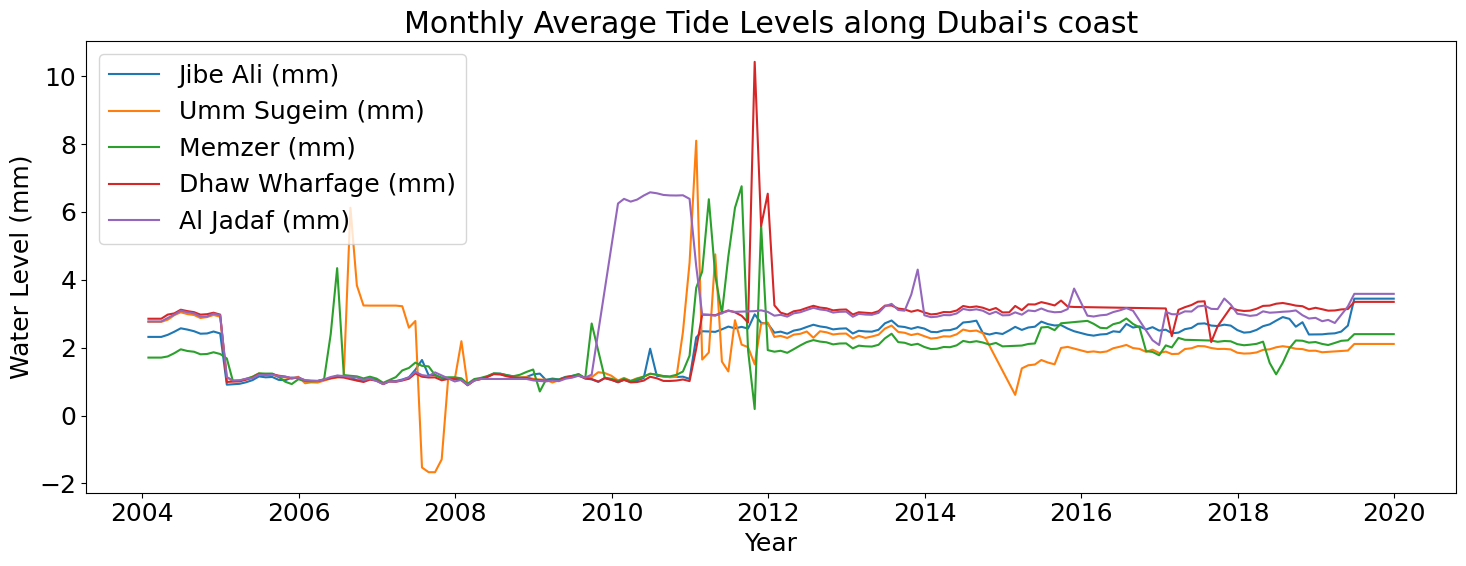

In [186]:
printGraph(df)

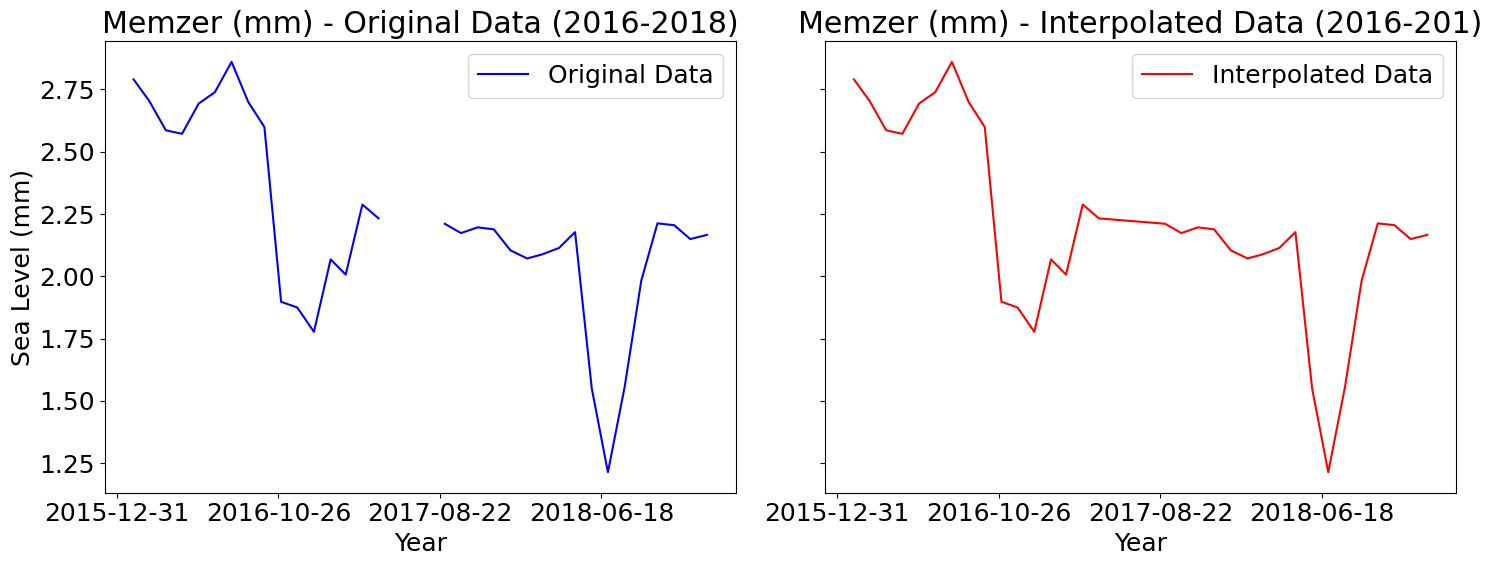

In [205]:
# Example of Linear Interpolation

# Filter data for Memzer from 2016 to 2019
demo_memzer = demo[(demo['Date'] >= '2016-01-01') & (demo['Date'] <= '2018-12-31')][['Date', 'Memzer (mm)','Year']]
df_memzer = df[(df['Date'] >= '2016-01-01') & (df['Date'] <= '2018-12-31')][['Date', 'Memzer (mm)','Year']]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharex=True, sharey=True)

# Plot initial data (demo)
axes[0].plot(demo_memzer['Date'], demo_memzer['Memzer (mm)'], label='Original Data', color='blue')
axes[0].set_title('Memzer (mm) - Original Data (2016-2018)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Sea Level (mm)')
axes[0].legend()

# Plot interpolated data (df)
axes[1].plot(df_memzer['Date'], df_memzer['Memzer (mm)'], label='Interpolated Data', color='red')
axes[1].set_title('Memzer (mm) - Interpolated Data (2016-201)')
axes[1].set_xlabel('Year')
axes[1].legend()

for ax in axes:
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))  # Reduce the number of x-axis labels
    for label in ax.get_xticklabels():
        label.set_rotation(0)
    
plt.tight_layout()
plt.show()

From the above graph, all the missing values are imputed. Only Dhaw Wharafage has the longer gap about an year which will be filled using Neural Network

## Training the LSTM for longer gaps

In [99]:
area = 'Dhaw Wharfage (mm)'
df_area = df[['Date',area]]
df_area

,Date,Dhaw Wharfage (mm)
0,2004-01-31,2.853417
1,2004-02-29,2.853417
2,2004-03-31,2.853417
3,2004-04-30,2.974607
4,2004-05-31,3.011566
...,...,...
187,2019-08-31,3.350319
188,2019-09-30,3.350319
189,2019-10-31,3.350319
190,2019-11-30,3.350319


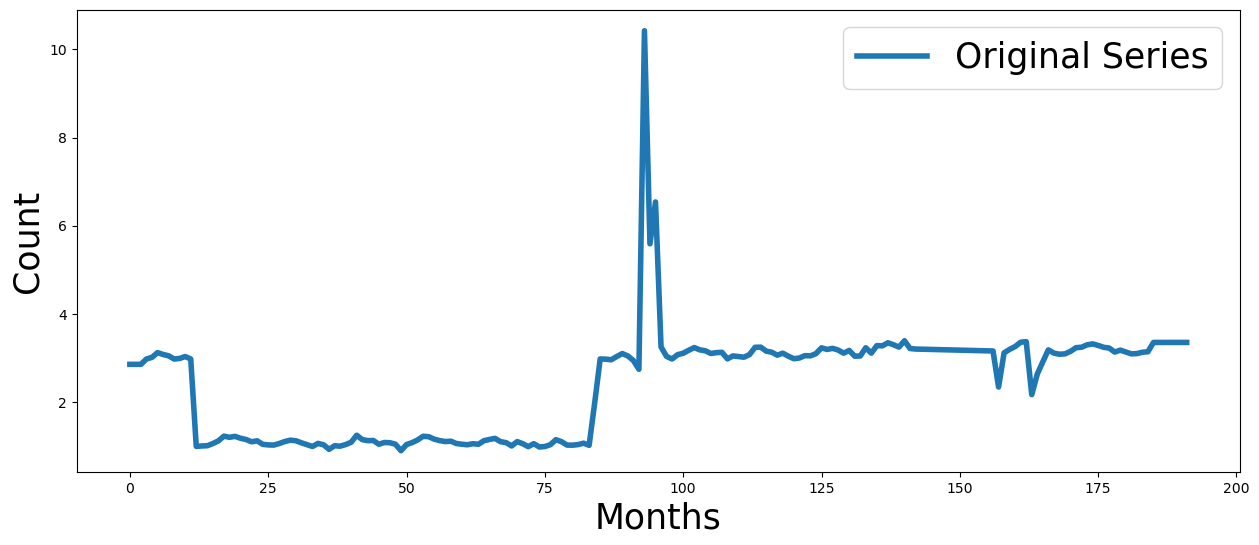

In [100]:
# Plotting the Orginal Series of Dhaw Wharfage
from matplotlib import pyplot as plt
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.plot(df[area], linewidth = 4, label = "Original Series")
plt.legend(fontsize=25)
plt.xlabel('Months', fontsize = 25)
plt.ylabel('Count', fontsize = 25)
plt.show()

In [102]:
import pandas as pd
history = 12 # last values used by model
future = 5 # predict future values

def Tranform_dataset(input_length, output_length, data):    
    df = data.copy()
    #x columns
    i = 0
    while i < input_length:
        df[f'x_{i}'] = df['Dhaw Wharfage (mm)'].shift(-i)
        i = i + 1
   
    #y columns
    j = 0
    while j < output_length:
        df[f'y_{j}'] = df['Dhaw Wharfage (mm)'].shift(-output_length-j)
        j = j + 1
    
    #drop last columns which might have NAN
    df = df.dropna(axis=0)
    return df

full_data = Tranform_dataset(history, future, df_area)
full_data.head(3)

,Date,Dhaw Wharfage (mm),x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,y_0,y_1,y_2,y_3,y_4
0,2004-01-31,2.853417,2.853417,2.853417,2.853417,2.974607,3.011566,3.119177,3.077329,3.046492,2.973833,2.986976,3.030506,2.974309,3.119177,3.077329,3.046492,2.973833,2.986976
1,2004-02-29,2.853417,2.853417,2.853417,2.974607,3.011566,3.119177,3.077329,3.046492,2.973833,2.986976,3.030506,2.974309,0.989977,3.077329,3.046492,2.973833,2.986976,3.030506
2,2004-03-31,2.853417,2.853417,2.974607,3.011566,3.119177,3.077329,3.046492,2.973833,2.986976,3.030506,2.974309,0.989977,1.000518,3.046492,2.973833,2.986976,3.030506,2.974309


In [103]:
X_cols = [col for col in full_data.columns if col.startswith('x')]

y_cols = [col for col in full_data.columns if col.startswith('y')]
X = full_data[X_cols].values
y = full_data[y_cols].values

print(X.shape, y.shape)

(181, 12) (181, 5)


In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

X_train = X_train.reshape(X_train.shape[0], history, 1)
X_test = X_test.reshape(X_test.shape[0], history, 1)
print(X_train.shape, X_test.shape)

(144, 12, 1) (37, 12, 1)


In [106]:
# Creating the LSTM model for prediciting the long gap

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, Conv1D
tf.random.set_seed(0)

def get_model_cnn_lstm(history, future):
    model = Sequential()
    model.add(tf.keras.Input(shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(6, return_sequences=False, activation='relu'))
    model.add(Dense(future))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model_cnnlstm = get_model_cnn_lstm(history, future)
model_cnnlstm.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 6)                   │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │              35 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227 (908.00 B)

 Trainable params: 227 (908.00 B)

 Non-trainable params: 0 (0.00 B)

In [295]:
model_cnnlstm.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 6)                   │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │              35 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683 (2.67 KB)

 Trainable params: 227 (908.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 456 (1.79 KB)

In [296]:
model_cnnlstm.save('FINAL_preprocessSimpleLSTM.keras')

In [108]:
filepath = 'LSTMDW.keras'
checkpoint_cnn_lstm = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=0, 
                             save_best_only=True,
                             mode='min')
callbacks_cnn_lstm = [checkpoint_cnn_lstm]

hist_cnn_lstm = model_cnnlstm.fit(X_train, y_train, epochs=2000, batch_size=16, verbose=0, validation_data=(X_test, y_test), 
                 shuffle=True, callbacks = callbacks_cnn_lstm)

In [110]:
model_cnnlstm.load_weights('LSTMDW.keras')

In [112]:
y_pred_cnn_lstm = model_cnnlstm.predict(X.reshape(X.shape[0], history, 1))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [113]:
pred_cnn_lstm = []

truth = []

for i in range(len(y_pred_cnn_lstm)):
    if i==(len(y_pred_cnn_lstm)-1):
        for j in range(len(y_pred_cnn_lstm[i])):
            pred_cnn_lstm.append(y_pred_cnn_lstm[i][j])
            truth.append(y[i][j])    
    else:
        pred_cnn_lstm.append(y_pred_cnn_lstm[i][0])
        truth.append(y[i][0])

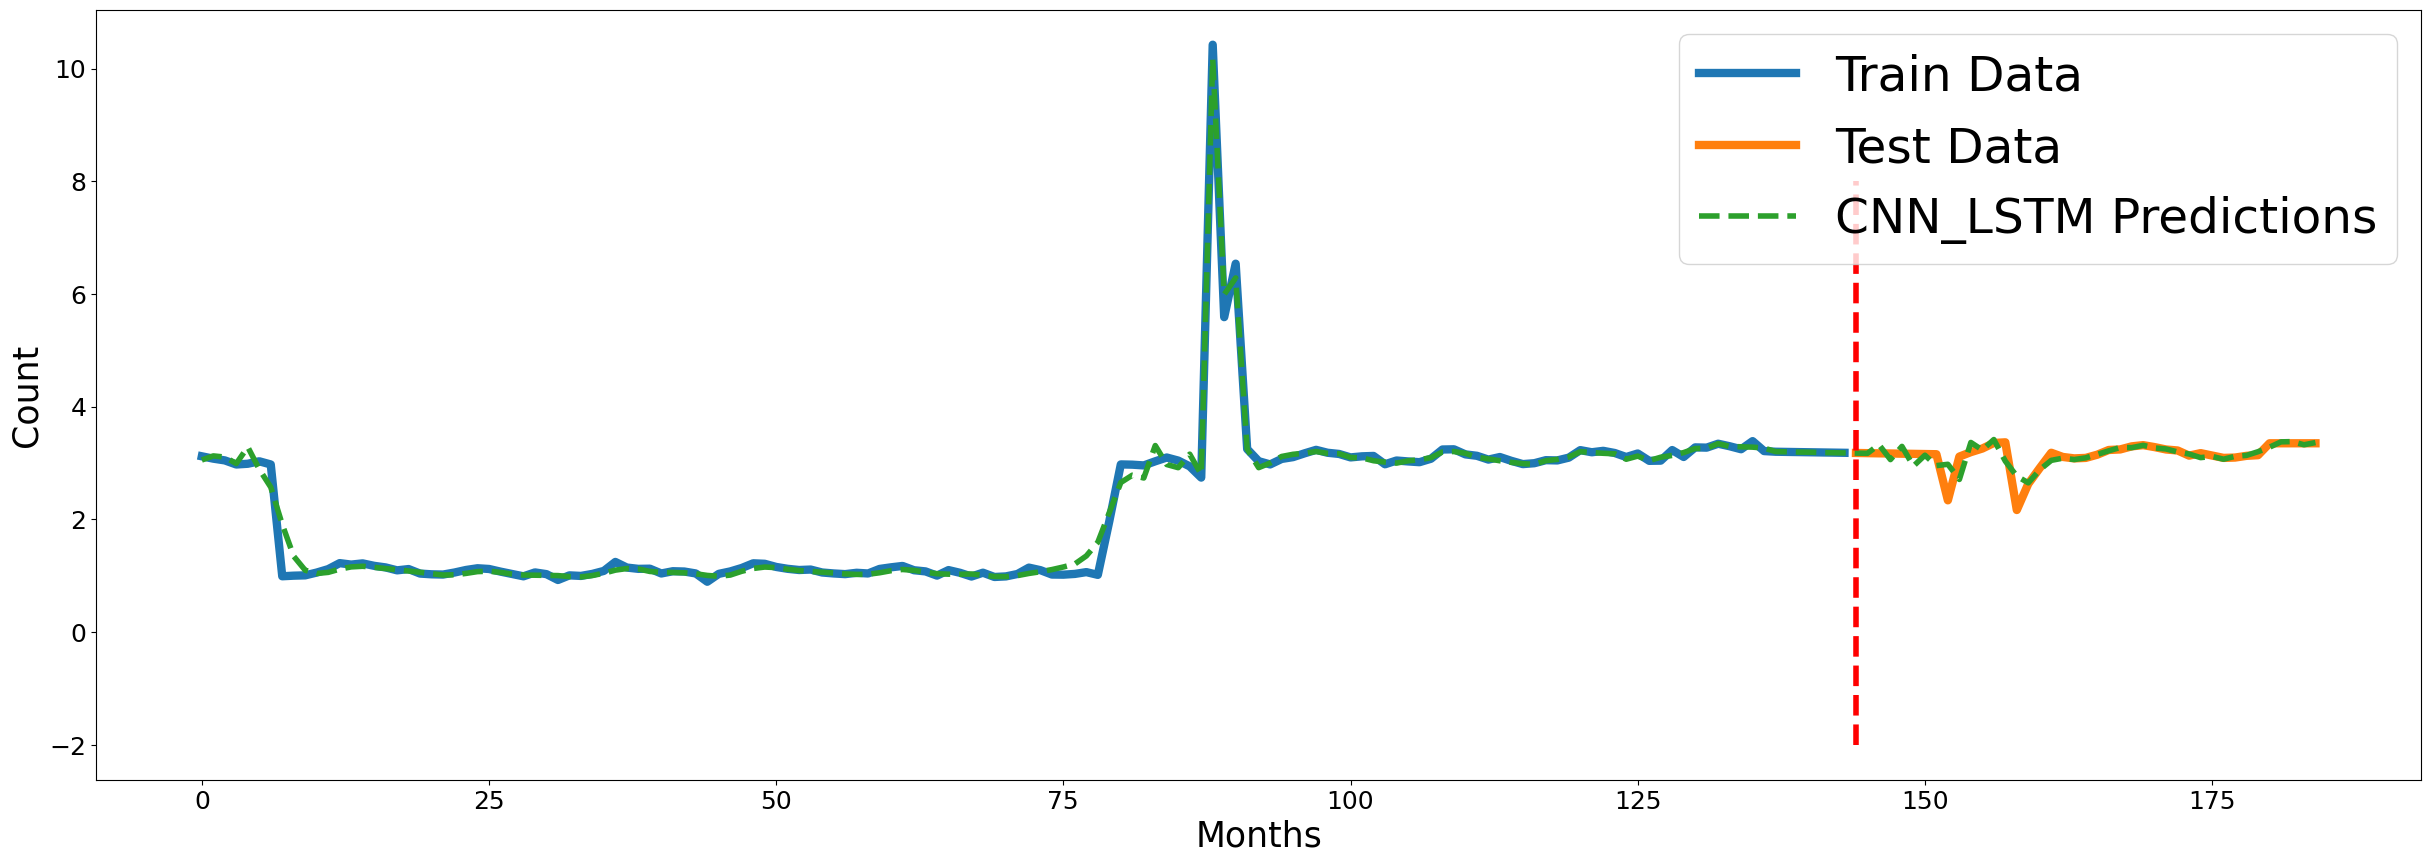

In [114]:
# Testing the model

from matplotlib import pyplot as plt
import numpy as np 

fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 18})

months = [i for i in range(len(truth))]

plt.plot(months[0:len(y_train)], truth[0:len(y_train)],label='Train Data', lw=6)
plt.plot(months[len(y_train):], truth[len(y_train):],label='Test Data', lw=6)

plt.plot(pred_cnn_lstm,label='CNN_LSTM Predictions', lw=4, linestyle='dashed')


plt.vlines(x=len(y_train), ymin=-2, ymax = 8, lw=4, linestyle='dashed', color='r')

plt.xlabel('Months', fontsize = 25)
plt.ylabel('Count', fontsize = 25)

plt.legend(fontsize = 35)
plt.show()

In [129]:
# Preparing the data for predictions of the gap
data = df_area.copy()
data = data[data['Date'] < "2016-01-31"]
data

,Date,Dhaw Wharfage (mm)
0,2004-01-31,2.853417
1,2004-02-29,2.853417
2,2004-03-31,2.853417
3,2004-04-30,2.974607
4,2004-05-31,3.011566
...,...,...
139,2015-08-31,3.244397
140,2015-09-30,3.388562
141,2015-10-31,3.212074
142,2015-11-30,3.200108


In [130]:
# Predicting the gap values using the model using the sliding window approach

pred = []
def generate_future_dates(start_date, periods):
    return pd.date_range(start=start_date, periods=periods, freq='M')
for i in range(3):
    window_ = data['Dhaw Wharfage (mm)'][-history:].values.reshape(-1,history,1)
    make_pred = model_cnnlstm.predict(window_).flatten()
    pred.extend(make_pred)
    last_date = data['Date'].iloc[-1]
    future_dates = generate_future_dates(last_date, future+1)[1:]
    pred_df = pd.DataFrame({
        'Date': future_dates,
        'Dhaw Wharfage (mm)': make_pred
    })
    data = pd.concat([data, pred_df], ignore_index=True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


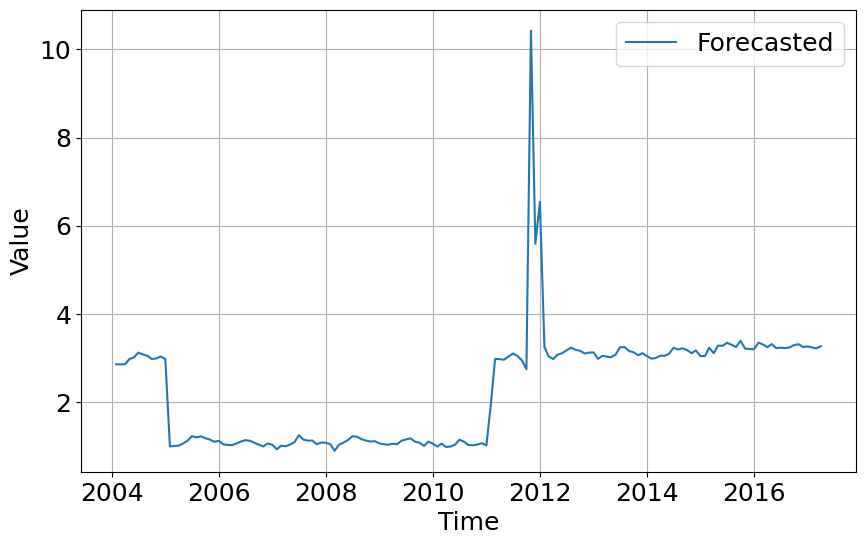

In [133]:
# To view the forecast values 

def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend()
    plt.grid(True)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_series(data['Date'], data['Dhaw Wharfage (mm)'], label='Forecasted')
plt.show()

In [139]:
data[(data['Date'] > "2016-01-01") & (data['Date'] < "2017-01-01")]['Dhaw Wharfage (mm)']

144    3.344193
145    3.306384
146    3.243719
147    3.311556
148    3.222221
149    3.230982
150    3.222239
151    3.238466
152    3.291605
153    3.309134
154    3.245628
155    3.259368
Name: Dhaw Wharfage (mm), dtype: float64

In [211]:
df.loc[(df['Date'] > "2016-01-01") & (df['Date'] < "2017-01-01"), 'Dhaw Wharfage (mm)'] = pred[:12]

In [212]:
# Viewing the predicted values in the final dataframe
df_final[df_final['Year']==2016]

,Year,Month,Jibe Ali (mm),Umm Sugeim (mm),Memzer (mm),Dhaw Wharfage (mm),Al Jadaf (mm)
Date,,,,,,,
2016-01-31,2016,1,2.381674,1.871211,2.790414,3.193761,2.943807
2016-02-29,2016,2,2.354649,1.889713,2.704119,3.190792,2.918509
2016-03-31,2016,3,2.388719,1.863571,2.585944,3.187618,2.953496
2016-04-30,2016,4,2.401701,1.888073,2.571949,3.184547,2.970447
2016-05-31,2016,5,2.483192,1.983411,2.693495,3.181373,3.050391
2016-06-30,2016,6,2.462144,2.027436,2.739004,3.178301,3.099425
2016-07-31,2016,7,2.701865,2.080526,2.860841,3.175128,3.165119
2016-08-31,2016,8,2.593507,1.988644,2.699785,3.171954,3.089204
2016-09-30,2016,9,2.627834,1.964990,2.599149,3.168883,2.802563


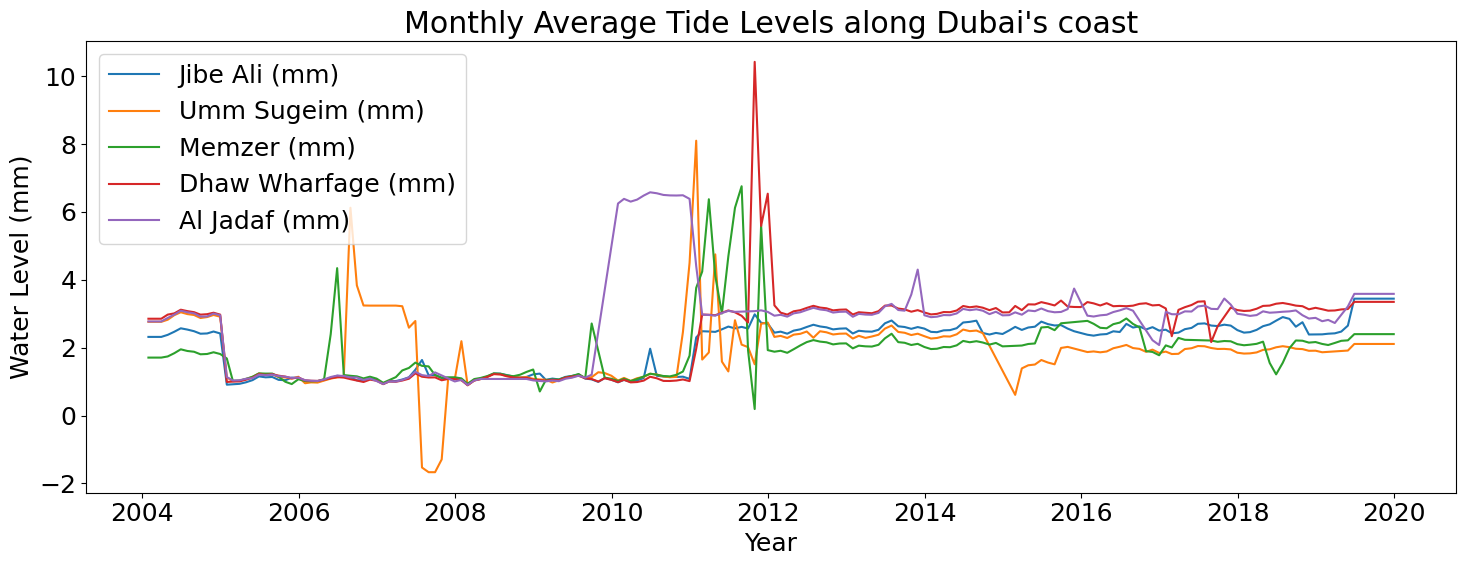

In [222]:
printGraph(df)

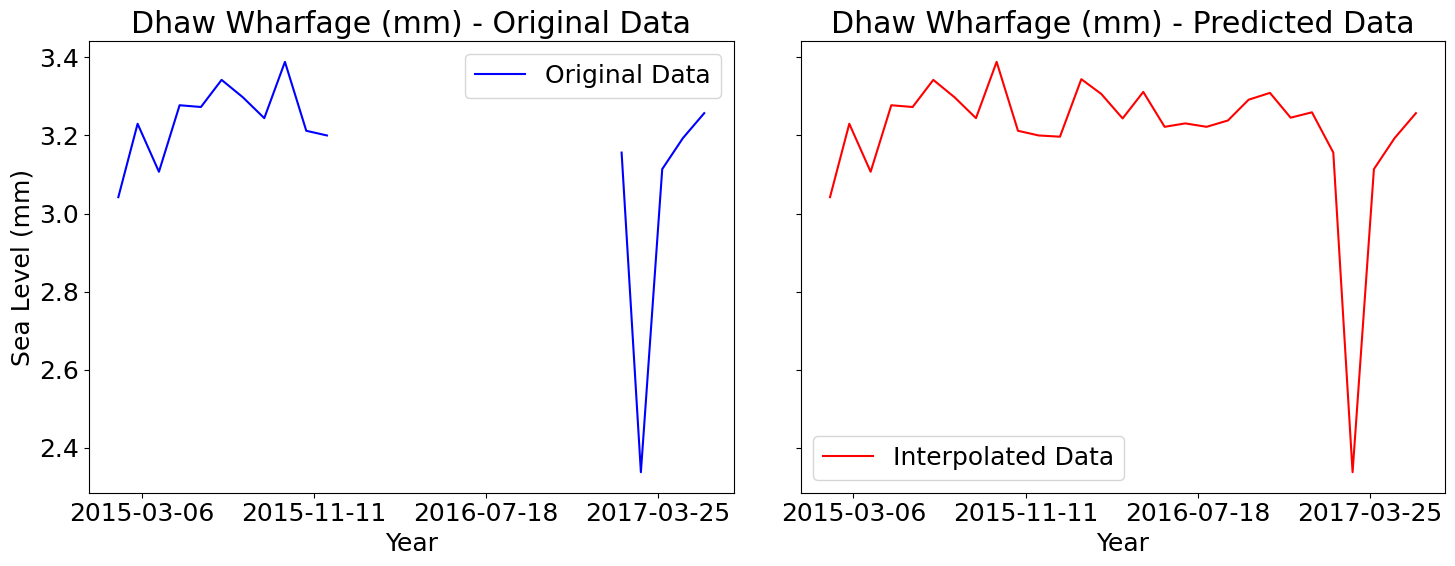

In [219]:
# Display the changes made using the LSTM model

# Convert 'Date' column to datetime in both dataframes
demo['Date'] = pd.to_datetime(demo[['Year', 'Month']].assign(DAY=1)) + pd.offsets.MonthEnd(1)
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for Dhaw Wharfage from 2015 to 2016
demo_dhaw = demo[(demo['Date'] >= '2015-01-01') & (demo['Date'] <= '2017-5-31')][['Date', 'Dhaw Wharfage (mm)']]
df_dhaw = df[(df['Date'] >= '2015-01-01') & (df['Date'] <= '2017-5-31')][['Date', 'Dhaw Wharfage (mm)']]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharex=True, sharey=True)
# To plot initial data
axes[0].plot(demo_dhaw['Date'], demo_dhaw['Dhaw Wharfage (mm)'], label='Original Data', color='blue')
axes[0].set_title('Dhaw Wharfage (mm) - Original Data')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Sea Level (mm)')
axes[0].legend()
# To plot predicted data
axes[1].plot(df_dhaw['Date'], df_dhaw['Dhaw Wharfage (mm)'], label='Interpolated Data', color='red')
axes[1].set_title('Dhaw Wharfage (mm) - Predicted Data')
axes[1].set_xlabel('Year')
axes[1].legend()

for ax in axes:
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))  
    for label in ax.get_xticklabels():
        label.set_rotation(0)

plt.tight_layout()
plt.show()

In [220]:
demo = df.copy()

In [221]:
df.isna().sum()

Year                  0
Month                 0
Jibe Ali (mm)         0
Umm Sugeim (mm)       0
Memzer (mm)           0
Dhaw Wharfage (mm)    0
Al Jadaf (mm)         0
Date                  0
dtype: int64

In [ ]:
df.to_csv('slr_processed.csv')

## Using the Kalman Filter for Smoothening

In [224]:
import pandas as pd
df_final = pd.read_csv("slr_processed.csv", index_col = [0])

In [225]:
df_final

,Year,Month,Jibe Ali (mm),Umm Sugeim (mm),Memzer (mm),Dhaw Wharfage (mm),Al Jadaf (mm),Date
0,2004,1,2.317679,2.762295,1.707807,2.853417,2.772815,2004-01-31
1,2004,2,2.317679,2.762295,1.707807,2.853417,2.772815,2004-02-29
2,2004,3,2.317679,2.762295,1.707807,2.853417,2.772815,2004-03-31
3,2004,4,2.377865,2.823819,1.741653,2.974607,2.876343,2004-04-30
4,2004,5,2.470564,2.959541,1.838213,3.011566,2.975748,2004-05-31
...,...,...,...,...,...,...,...,...
187,2019,8,3.444781,2.109665,2.399351,3.350319,3.586558,2019-08-31
188,2019,9,3.444781,2.109665,2.399351,3.350319,3.586558,2019-09-30
189,2019,10,3.444781,2.109665,2.399351,3.350319,3.586558,2019-10-31
190,2019,11,3.444781,2.109665,2.399351,3.350319,3.586558,2019-11-30


     Year  Month  Jibe Ali (mm)  Umm Sugeim (mm)  Memzer (mm)  \
0    2004      1       2.317679         2.762295     1.707807   
1    2004      2       2.317679         2.762295     1.707807   
2    2004      3       2.317679         2.762295     1.707807   
3    2004      4       2.377865         2.823819     1.741653   
4    2004      5       2.470564         2.959541     1.838213   
..    ...    ...            ...              ...          ...   
187  2019      8       3.444781         2.109665     2.399351   
188  2019      9       3.444781         2.109665     2.399351   
189  2019     10       3.444781         2.109665     2.399351   
190  2019     11       3.444781         2.109665     2.399351   
191  2019     12       3.444781         2.109665     2.399351   

     Dhaw Wharfage (mm)  Al Jadaf (mm)        Date  Jibe Ali (mm) (filtered)  \
0              2.853417       2.772815  2004-01-31                  2.311899   
1              2.853417       2.772815  2004-02-29         

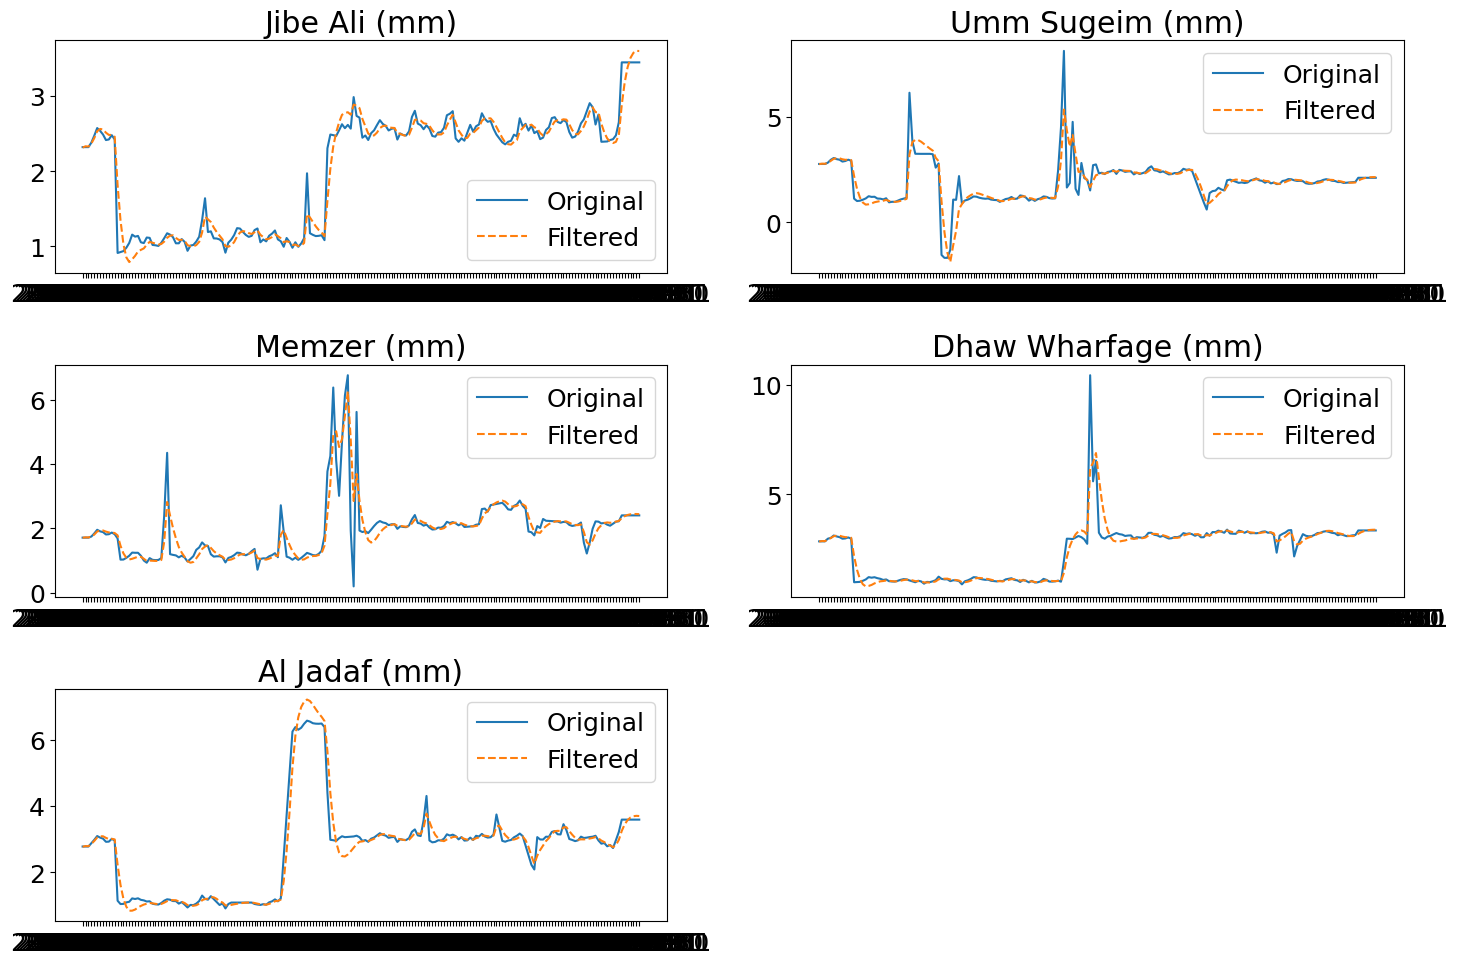

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter

# Kalman Filter parameters
def kalman_filter(data):
    kf = KalmanFilter(dim_x=2, dim_z=1)
    kf.x = np.array([[0.], [0.]])  # initial state (location and velocity)
    kf.F = np.array([[1., 1.],
                     [0., 1.]])  # state transition matrix
    kf.H = np.array([[1., 0.]])   # Measurement function
    kf.P *= 1000.                 # covariance matrix
    kf.R = 5                      # state uncertainty
    kf.Q = 0.1                    # process uncertainty

    filtered_data = []
    for z in data:
        kf.predict()
        kf.update([z])
        filtered_data.append(kf.x[0][0])

    return filtered_data

# Display the results after applying the filters
areas = ['Jibe Ali (mm)', 'Umm Sugeim (mm)', 'Memzer (mm)', 'Dhaw Wharfage (mm)', 'Al Jadaf (mm)']
for area in areas:
    df_final[f'{area} (filtered)'] = kalman_filter(df_final[area])
print(df_final)

# Plot the results for each area after applying the filter
plt.figure(figsize=(15, 10))
for i, area in enumerate(areas):
    plt.subplot(3, 2, i+1)
    plt.plot(df_final['Date'], df_final[area], label='Original')
    plt.plot(df_final['Date'], df_final[f'{area} (filtered)'], label='Filtered', linestyle='--')
    plt.title(area)
    plt.legend()

plt.tight_layout()
plt.show()


In [227]:
# Formatting the data as required for the next training steps
for area in areas:
    df_final[area] = df_final[f'{area} (filtered)']
    df_final.drop(f'{area} (filtered)', axis = 1, inplace = True)

In [228]:
df_final

,Year,Month,Jibe Ali (mm),Umm Sugeim (mm),Memzer (mm),Dhaw Wharfage (mm),Al Jadaf (mm),Date
0,2004,1,2.311899,2.755406,1.703549,2.846301,2.765900,2004-01-31
1,2004,2,2.328817,2.775569,1.716015,2.867129,2.786140,2004-02-29
2,2004,3,2.325260,2.771330,1.713394,2.862750,2.781884,2004-03-31
3,2004,4,2.365526,2.812167,1.735703,2.945333,2.852154,2004-04-30
4,2004,5,2.438600,2.911484,1.803511,3.002697,2.942095,2004-05-31
...,...,...,...,...,...,...,...,...
187,2019,8,3.379349,2.089449,2.412570,3.320969,3.572541,2019-08-31
188,2019,9,3.504983,2.118592,2.433358,3.354177,3.650429,2019-09-30
189,2019,10,3.572053,2.134695,2.441854,3.373211,3.689136,2019-10-31
190,2019,11,3.597562,2.141418,2.442230,3.381881,3.700706,2019-11-30


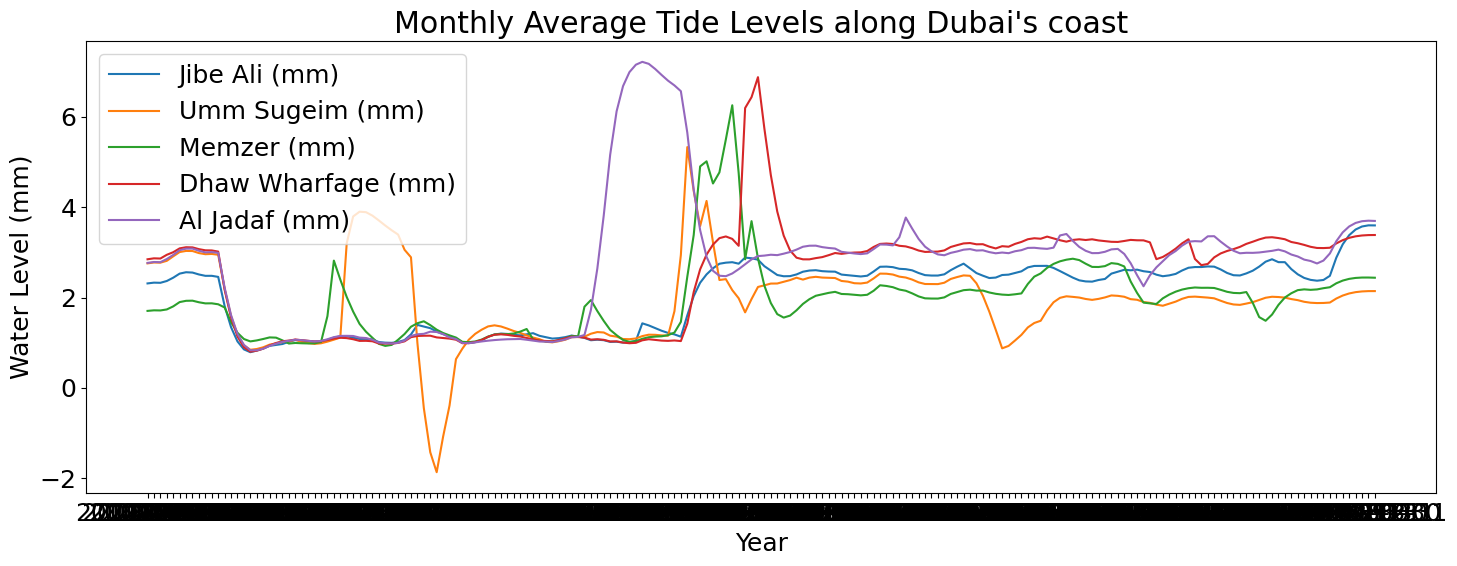

In [286]:
# Output after data pre-processing

# df_final.reset_index(inplace=True)
printGraph(df_final)

In [285]:
# Saving the processed data to a csv file
df_final.to_csv('slr_processed.csv')

In [293]:
# Function to perform ADF test on each column and print the p-value
import pandas as pd
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv('slr_processed.csv', index_col = [0])
def adf_test_all_areas(df):
    for column in df.columns:
        result = adfuller(df[column])
        print(f'ADF Statistic for {column}: {result[0]}')
        print(f'p-value for {column}: {result[1]}')
        print('Critical Values:')
        for key, value in result[4].items():
            print(f'   {key}: {value}')
        print()

# Perform ADF test on all columns
adf_test_all_areas(df)


ADF Statistic for index: -10.467353895635513
p-value for index: 1.3111915217227038e-18
Critical Values:
   1%: -3.4654311561944873
   5%: -2.8769570530458792
   10%: -2.574988319755886

ADF Statistic for Year: 0.2775283436387584
p-value for Year: 0.9762896819247976
Critical Values:
   1%: -3.4672111510631
   5%: -2.877734766803841
   10%: -2.575403364197531

ADF Statistic for Month: -322348421057762.2
p-value for Month: 0.0
Critical Values:
   1%: -3.467845319799907
   5%: -2.878011745497439
   10%: -2.575551186759871

ADF Statistic for Jibe Ali (mm): -0.9786077152452377
p-value for Jibe Ali (mm): 0.7609864700231781
Critical Values:
   1%: -3.466398230774071
   5%: -2.8773796387256514
   10%: -2.575213838610586

ADF Statistic for Umm Sugeim (mm): -5.229773987299106
p-value for Umm Sugeim (mm): 7.641393095894572e-06
Critical Values:
   1%: -3.465620397124192
   5%: -2.8770397560752436
   10%: -2.5750324547306476

ADF Statistic for Memzer (mm): -3.574252048404058
p-value for Memzer (mm):

ValueError: could not convert string to float: '2004-01-31'

In [294]:
df

,index,Year,Month,Jibe Ali (mm),Umm Sugeim (mm),Memzer (mm),Dhaw Wharfage (mm),Al Jadaf (mm),Date
0,0,2004,1,2.311899,2.755406,1.703549,2.846301,2.765900,2004-01-31
1,1,2004,2,2.328817,2.775569,1.716015,2.867129,2.786140,2004-02-29
2,2,2004,3,2.325260,2.771330,1.713394,2.862750,2.781884,2004-03-31
3,3,2004,4,2.365526,2.812167,1.735703,2.945333,2.852154,2004-04-30
4,4,2004,5,2.438600,2.911484,1.803511,3.002697,2.942095,2004-05-31
...,...,...,...,...,...,...,...,...,...
187,187,2019,8,3.379349,2.089449,2.412570,3.320969,3.572541,2019-08-31
188,188,2019,9,3.504983,2.118592,2.433358,3.354177,3.650429,2019-09-30
189,189,2019,10,3.572053,2.134695,2.441854,3.373211,3.689136,2019-10-31
190,190,2019,11,3.597562,2.141418,2.442230,3.381881,3.700706,2019-11-30


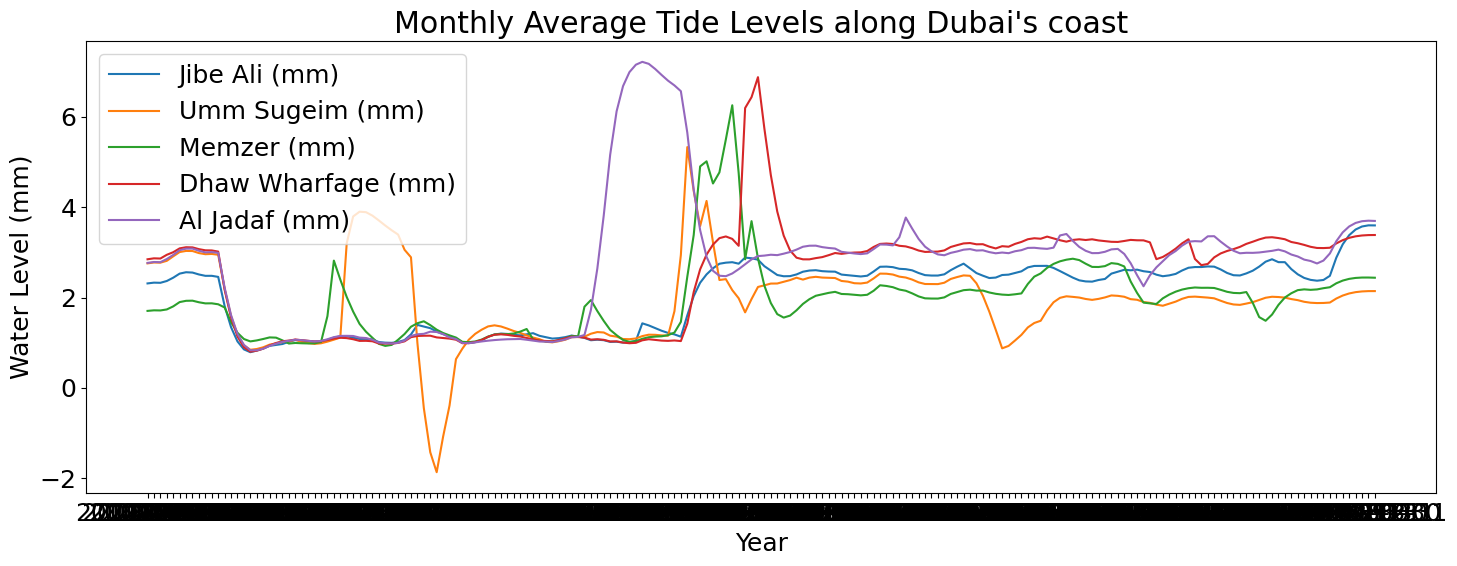

In [288]:
printGraph(df)

In [159]:
# Calculate annual average sea level

for area in areas:
    annual_avg = df_final.groupby('Year')[area].mean().reset_index()
    # Calculate the year-over-year increase
    annual_avg['Yearly Increase (mm)'] = annual_avg[area].diff()
    # Calculate the average annual increase (excluding the first NaN value)
    average_annual_increase = annual_avg['Yearly Increase (mm)'][1:].mean()
    print(f'Average Annual Increase in Sea Level: {area, average_annual_increase} mm/year')

Average Annual Increase in Sea Level: ('Jibe Ali (mm)', 0.035747751471413736) mm/year
Average Annual Increase in Sea Level: ('Umm Sugeim (mm)', -0.06036337646828871) mm/year
Average Annual Increase in Sea Level: ('Memzer (mm)', 0.03281288308769118) mm/year
Average Annual Increase in Sea Level: ('Dhaw Wharfage (mm)', 0.01584561954167551) mm/year
Average Annual Increase in Sea Level: ('Al Jadaf (mm)', 0.02124206190546336) mm/year


In [44]:
df_final

,Date,Year,Month,Jibe Ali (mm),Umm Sugeim (mm),Memzer (mm),Dhaw Wharfage (mm),Al Jadaf (mm)
0,2004-01-31,2004,1,2.311899,2.755406,1.703549,2.846301,2.765900
1,2004-02-29,2004,2,2.328817,2.775569,1.716015,2.867129,2.786140
2,2004-03-31,2004,3,2.325260,2.771330,1.713394,2.862750,2.781884
3,2004-04-30,2004,4,2.365526,2.812167,1.735703,2.945333,2.852154
4,2004-05-31,2004,5,2.438600,2.911484,1.803511,3.002697,2.942095
...,...,...,...,...,...,...,...,...
187,2019-08-31,2019,8,3.379349,2.089449,2.412570,3.321088,3.572494
188,2019-09-30,2019,9,3.504983,2.118592,2.433358,3.354272,3.650381
189,2019-10-31,2019,10,3.572053,2.134695,2.441854,3.373281,3.689093
190,2019-11-30,2019,11,3.597562,2.141418,2.442230,3.381930,3.700670


In [231]:
df = df_final.copy()

In [281]:
# To display an example of output after Kalman Filtering

demo['Date'] = pd.to_datetime(demo[['Year', 'Month']].assign(DAY=1)) + pd.offsets.MonthEnd(1)
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for Dhaw Wharfage from 2015 to 2017
demo_dhaw = demo[(demo['Date'] >= '2015-01-01') & (demo['Date'] <= '2017-5-31')][['Date', 'Dhaw Wharfage (mm)','Year']]
df_dhaw = df[(df['Date'] >= '2015-01-01') & (df['Date'] <= '2017-5-31')][['Date', 'Dhaw Wharfage (mm)']]

# Filter data for Memzar from 2016 to 2018
demo_memzar = demo[(demo['Date'] >= '2016-01-01') & (demo['Date'] <= '2018-12-31')][['Date', 'Memzer (mm)','Year']]
df_memzar = df[(df['Date'] >= '2016-01-01') & (df['Date'] <= '2018-12-31')][['Date', 'Memzer (mm)']]

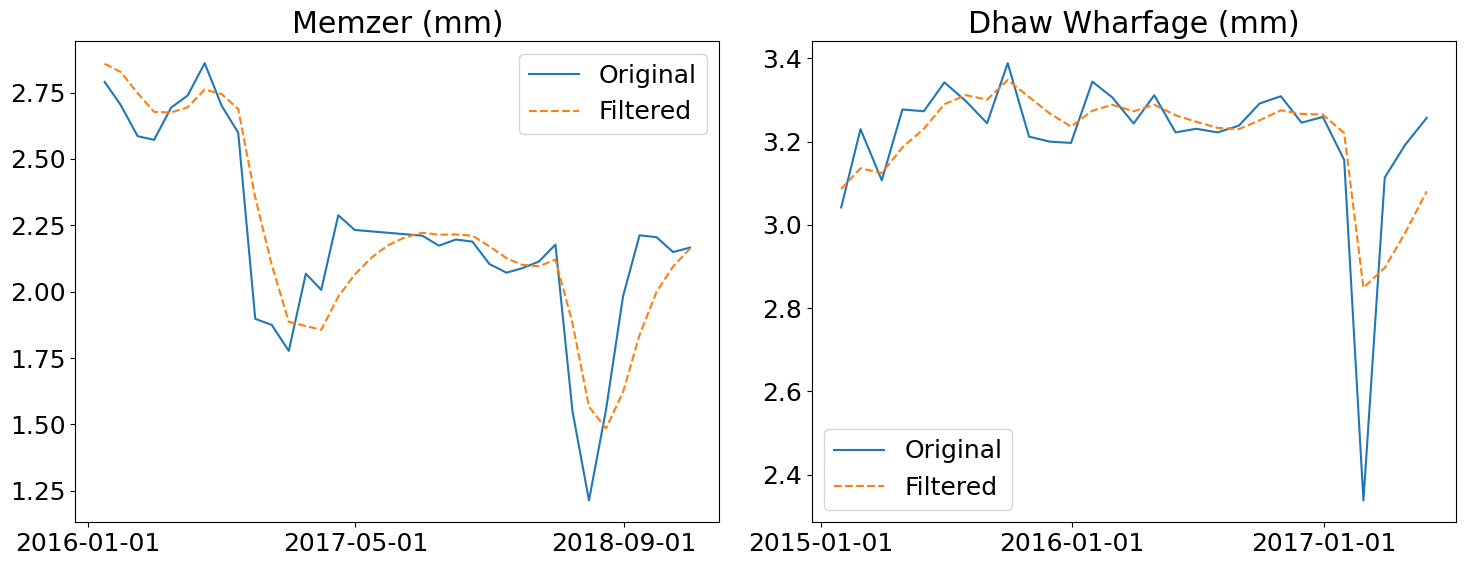

In [282]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(demo_memzar['Date'], demo_memzar['Memzer (mm)'], label='Original')
plt.plot(df_memzar['Date'], df_memzar['Memzer (mm)'], label='Filtered', linestyle='--')
plt.title(area)
plt.legend()
plt.xticks(ticks=plt.gca().get_xticks()[::4]) 

plt.subplot(1, 2, 2)
plt.plot(demo_dhaw['Date'], demo_dhaw['Dhaw Wharfage (mm)'], label='Original')
plt.plot(df_dhaw['Date'], df_dhaw['Dhaw Wharfage (mm)'], label='Filtered', linestyle='--')
plt.title('Dhaw Wharfage (mm)')
plt.xticks(ticks=plt.gca().get_xticks()[::4]) 
plt.legend() 
plt.tight_layout()
plt.show()